In [7]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.preferred_beliefs_configs import *
import scipy
import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
PAIRS_PATH = "/data/patrick_res/sessions/SA/pairs_at_least_3blocks_10sess_more_sess.pickle"


### Sam, Stim Onset, Temporal drive

In [23]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)


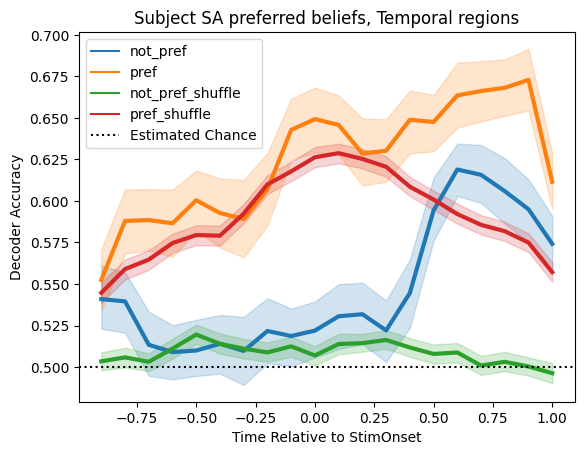

In [24]:
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

### Sam, Stim Onset, Anterior drive

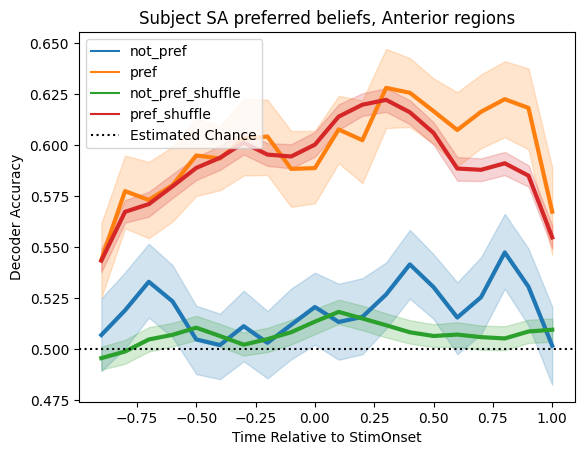

In [26]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Anterior"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)
